In [1]:
#installed packages for the libraries 
# initialising libraries
library(tidyverse)
library(rvest)
library(readr)
library(skimr)
library(visdat)
library(purrr)
library(stringr)
library(glue)
library(jsonlite)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.8     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.1
v readr   2.1.2     v forcats 0.5.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'rvest'


The following object is masked from 'package:readr':

    guess_encoding



Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten




In [30]:
# setting up the API query for cycle lane in auckland transport data 
#api <- 'https://services2.arcgis.com/JkPEgZJGxhSjYOo0/arcgis/rest/services/TrafficService/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'
#api

api = GET(url = "https://services2.arcgis.com/JkPEgZJGxhSjYOo0/arcgis/rest/services/CyclingService/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
api

Response [https://services2.arcgis.com/JkPEgZJGxhSjYOo0/arcgis/rest/services/CyclingService/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json]
  Date: 2022-10-29 05:54
  Status: 200
  Content-Type: application/json; charset=utf-8
  Size: 1.02 MB


In [31]:
bike_text = content(api, "text", encoding = "UTF-8") #Converting the retrieved data into text. This is done so we can convert into a json and eventually a list or dataframe.
bike_text

#reading JSON 
biketransport <- fromJSON(bike_text, flatten = TRUE)

biketransport %>%
    glimpse()

[1] "{\"objectIdFieldName\":\"OBJECTID\",\"uniqueIdField\":{\"name\":\"OBJECTID\",\"isSystemMaintained\":true},\"globalIdFieldName\":\"\",\"geometryProperties\":{\"shapeLengthFieldName\":\"Shape__Length\",\"units\":\"esriMeters\"},\"geometryType\":\"esriGeometryPolyline\",\"spatialReference\":{\"wkid\":4326,\"latestWkid\":4326},\"fields\":[{\"name\":\"OBJECTID\",\"type\":\"esriFieldTypeOID\",\"alias\":\"OBJECTID\",\"sqlType\":\"sqlTypeOther\",\"domain\":null,\"defaultValue\":null},{\"name\":\"IDENTIFIER\",\"type\":\"esriFieldTypeInteger\",\"alias\":\"Identifier\",\"sqlType\":\"sqlTypeOther\",\"domain\":null,\"defaultValue\":null},{\"name\":\"ROUTEFUNCTION\",\"type\":\"esriFieldTypeString\",\"alias\":\"Route Function\",\"sqlType\":\"sqlTypeOther\",\"length\":50,\"domain\":null,\"defaultValue\":null},{\"name\":\"ROADNAME\",\"type\":\"esriFieldTypeString\",\"alias\":\"Road Name\",\"sqlType\":\"sqlTypeOther\",\"length\":254,\"domain\":null,\"defaultValue\":null},{\"name\":\"STATUS\",\"type\":\"esriFieldTypeString\",\"alias\":\"Status\",\"sqlType\":\"sqlTypeOther\",\"length\":50,\"domain\":null,\"defaultValue\":null},{\"name\":\"CONSTRUCTIONYEAR\",\"type\":\"esriFieldTypeSmallInteger\",\"alias\":\"Construction Year\",\"sqlType\":\"sqlTypeOther\",\"domain\":null,\"defaultValue\":null},{\"name\":\"LOCALBOARD\",\"type\":\"esriFieldTypeString\",\"alias\":\"Local Board\",\"sqlType\":\"sqlTypeOther\",\"length\":50,\"domain\":null,\"defaultValue\":null},{\"name\":\"VEHICLESPEEDLIMIT\",\"type\":\"esriFieldTypeSmallInteger\",\"alias\":\"Vehicle Speed Limit\",\"sqlType\":\"sqlTypeOther\",\"domain\":null,\"defaultValue\":null},{\"name\":\"TRAFFICAADT\",\"type\":\"esriFieldTypeString\",\"alias\":\"Traffic AADT\",\"sqlType\":\"sqlTypeOther\",\"length\":20,\"domain\":null,\"defaultValue\":null},{\"name\":\"TYPEOFFACILITY\",\"type\":\"esriFieldTypeString\",\"alias\":\"Type of Facility\",\"sqlType\":\"sqlTypeOther\",\"length\":50,\"domain\":null,\"defaultValue\":null},{\"name\":\"JOURNEYCORRIDOR\",\"type\":\"esriFieldTypeString\",\"alias\":\"Journey Corridor\",\"sqlType\":\"sqlTypeOther\",\"length\":50,\"domain\":null,\"defaultValue\":null},{\"name\":\"Shape__Length\",\"type\":\"esriFieldTypeDouble\",\"alias\":\"Shape__Length\",\"sqlType\":\"sqlTypeDouble\",\"domain\":null,\"defaultValue\":null}],\"exceededTransferLimit\":true,\"features\":[{\"attributes\":{\"OBJECTID\":1,\"IDENTIFIER\":1,\"ROUTEFUNCTION\":null,\"ROADNAME\":\"Bay connection\",\"STATUS\":\"Existing\",\"CONSTRUCTIONYEAR\":null,\"LOCALBOARD\":\"Howick\",\"VEHICLESPEEDLIMIT\":null,\"TRAFFICAADT\":null,\"TYPEOFFACILITY\":\"Off-road shared path\",\"JOURNEYCORRIDOR\":null,\"Shape__Length\":5.74652061487827},\"geometry\":{\"paths\":[[[174.859159369276,-36.9088091954044],[174.859190400272,-36.9087638002993]]]}},{\"attributes\":{\"OBJECTID\":2,\"IDENTIFIER\":1,\"ROUTEFUNCTION\":null,\"ROADNAME\":\"Bay connection\",\"STATUS\":\"Existing\",\"CONSTRUCTIONYEAR\":null,\"LOCALBOARD\":\"Howick\",\"VEHICLESPEEDLIMIT\":null,\"TRAFFICAADT\":null,\"TYPEOFFACILITY\":\"Off-road shared path\",\"JOURNEYCORRIDOR\":null,\"Shape__Length\":963.546208892198},\"geometry\":{\"paths\":[[[174.859202899441,-36.9087454997495],[174.859345599913,-36.9086416000951],[174.859489800521,-36.9085450000373],[174.859550500188,-36.9084878999151],[174.859710100202,-36.9083746003149],[174.859748999648,-36.9083230997741],[174.859854899529,-36.9081827998828],[174.860058400035,-36.9080289999853],[174.860197999658,-36.9078588997205],[174.860280399823,-36.907669100005],[174.860372500177,-36.9075152003217],[174.860422600196,-36.9074449000715],[174.860570300015,-36.9073390999878],[174.860669899983,-36.9072233996507],[174.860813000466,-36.9071448002588],[174.860920900534,-36.9071120996267],[174.861080600346,-36.9071092997993],[174.86119609968,-36.9071455996198],[174.861322799762,-36.9071960998946],[174.861461099998,-36.9072776003999],[174.861528199932,-36.9073586998147],[174.861559100558,-36.907438800086],[174.861603000052,-36.907636400

List of 9
 $ objectIdFieldName    : chr "OBJECTID"
 $ uniqueIdField        :List of 2
  ..$ name              : chr "OBJECTID"
  ..$ isSystemMaintained: logi TRUE
 $ globalIdFieldName    : chr ""
 $ geometryProperties   :List of 2
  ..$ shapeLengthFieldName: chr "Shape__Length"
  ..$ units               : chr "esriMeters"
 $ geometryType         : chr "esriGeometryPolyline"
 $ spatialReference     :List of 2
  ..$ wkid      : int 4326
  ..$ latestWkid: int 4326
 $ fields               :'data.frame':	12 obs. of  7 variables:
  ..$ name        : chr [1:12] "OBJECTID" "IDENTIFIER" "ROUTEFUNCTION" "ROADNAME" ...
  ..$ type        : chr [1:12] "esriFieldTypeOID" "esriFieldTypeInteger" "esriFieldTypeString" "esriFieldTypeString" ...
  ..$ alias       : chr [1:12] "OBJECTID" "Identifier" "Route Function" "Road Name" ...
  ..$ sqlType     : chr [1:12] "sqlTypeOther" "sqlTypeOther" "sqlTypeOther" "sqlTypeOther" ...
  ..$ domain      : logi [1:12] NA NA NA NA NA NA ...
  ..$ defaultValue: logi [

In [39]:

bikefields <-as.data.frame(biketransport$fields) 
bikedata <-as.data.frame(biketransport$features) 
bikedata %>%
    glimpse
#both elements displaying fields and festures and turning both elements into a dataframe

Rows: 1,000
Columns: 13
$ attributes.OBJECTID          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13~
$ attributes.IDENTIFIER        <int> 1, 1, 1, 3, 3, 5, 6, 6, 7, 7, 7, 7, 7, 8,~
$ attributes.ROUTEFUNCTION     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N~
$ attributes.ROADNAME          <chr> "Bay connection", "Bay connection", "Bay ~
$ attributes.STATUS            <chr> "Existing", "Existing", "Existing", "Exis~
$ attributes.CONSTRUCTIONYEAR  <int> NA, NA, NA, NA, NA, 2012, 2012, 2012, NA,~
$ attributes.LOCALBOARD        <chr> "Howick", "Howick", "Howick", "Upper Harb~
$ attributes.VEHICLESPEEDLIMIT <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N~
$ attributes.TRAFFICAADT       <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N~
$ attributes.TYPEOFFACILITY    <chr> "Off-road shared path", "Off-road shared ~
$ attributes.JOURNEYCORRIDOR   <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N~
$ attributes.Shape__Length     <dbl> 5.746521, 963.546209, 415.740382, 110.928~
$ geometry.paths

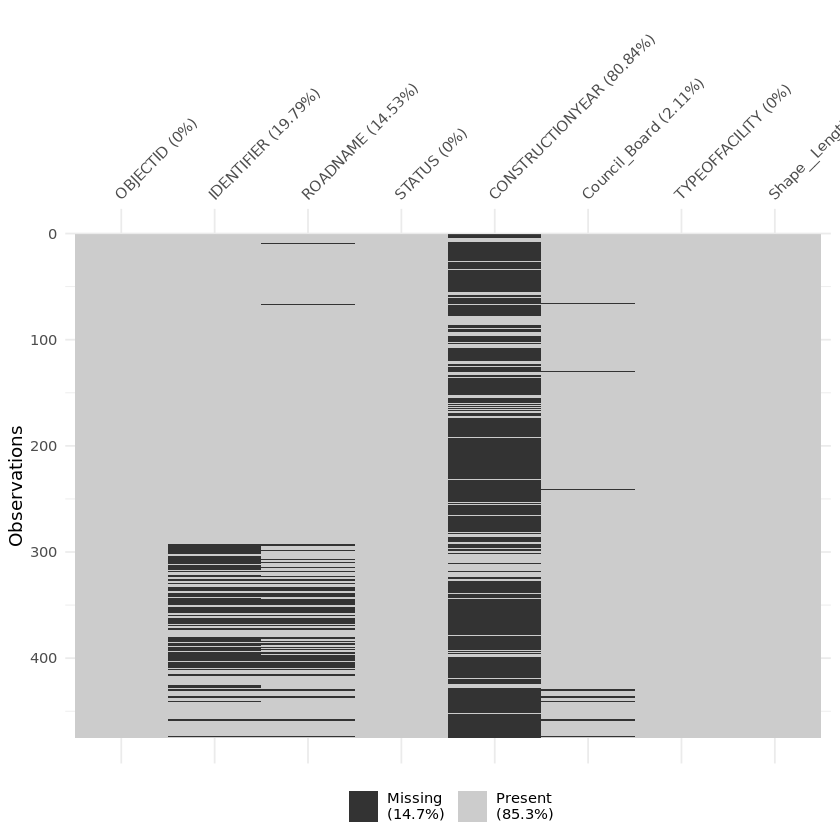

In [48]:
#filtering only OFF-ROAD SHARED PATH 
bike_data <- bikedata %>%
    filter(attributes.TYPEOFFACILITY == "Off-road shared path")

#removing unwanted columns and columns that are all NAs
bike_data <- select(bike_data, -attributes.ROUTEFUNCTION, -attributes.VEHICLESPEEDLIMIT, -attributes.TRAFFICAADT, -attributes.JOURNEYCORRIDOR, -geometry.paths)

#renaming column title
bike_data <- bike_data %>% rename(
    Council_Board = attributes.LOCALBOARD)

#bike_data <- c(1,2,3,NA) %>% is.na(bike_data)

colnames(bike_data) = gsub("attributes.", "", colnames(bike_data))

vis_miss(bike_data)

In [49]:
bike_data %>%
    write_csv("bike_data.csv")